# Binary Sentiment Analysis of French Movie Reviews

### Objectives
1. Text cleaning
2. Text preprocessing for custom embedding Neural Network
3. Train RNN model for sentiment analysis

# 0. Load data

My dataset contains 30,000 french reviews of movies, along with the binary class 1 (positive) or 0 (negative) score

In [1]:
#load the dataset
import pandas as pd
import numpy as np
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/movies.csv')
data.head(5)

,review,polarity
0,Ça commence à devenir énervant d'avoir l'impre...,0
1,"J'ai aimé ce film, si il ressemble a un docume...",1
2,Une grosse merde ce haneke ce faire produire p...,0
3,"Beau mélodrame magnifiquement photographié, ""V...",1
4,A la poursuite du diamant vers est un film pro...,1


In [2]:
# create features
y = data.polarity
X = data.review

# analyse class balance
print(pd.value_counts(y))

1    15051
0    14900
Name: polarity, dtype: int64


In [3]:
#check various reviews
print(f'polarity: {y[0]} \n')
print(X[0])

polarity: 0 

Ça commence à devenir énervant d'avoir l'impression de voir et revoir le même genre de film à savoir : la comédie romantique, surement le genre le plus prolifique de le production française actuelle. Le problème c'est que l'on a souvent affaire à des niaiseries de faible niveau comme celui ci. Avec un scenario ultra balisé et conventionnel, c'est à se demander comment ça peut passer les portes d'un producteur. Bref cette sempiternel histoire d'un homme mentant au nom de l'amour pour reconquérir une femme et qui à la fin se prend son mensonge en pleine figure est d'une originalité affligeante, et ce n'est pas la présence au casting de l'ex miss météo Charlotte Le Bon qui rêve surement d'avoir la même carrière que Louise Bourgoin qui change la donne.


# 1. Clean Text

❓ Apply cleaning to all the sentences in the dataset:
- Replace french accents by their non-accentuated equivalent using the [unidecode.unidecode()](https://pypi.org/project/Unidecode/) method
- Reduce all uppercases to lowercases
- Remove any characters outside of a-z`

In [4]:
### YOUR CODE
from unidecode import unidecode

In [5]:
#Function to remove accents
def func_unidecode(df_series):
    new_series = []
    for text in df_series:
        new_series.append(unidecode(text))
    return new_series

In [6]:
X_unaccented = func_unidecode(X)

In [7]:
#Function to apply lowercas to each comment
def lowercase(df_series):
    new_series = []
    for text in df_series:
        new_series.append(text.lower())
    return new_series

In [8]:
X_lower = lowercase(X_unaccented)

In [9]:
#Function to remove punctuation from comments
import string
def remove_punct(df_series):
    new_series = []
    for text in df_series:
        for punctuation in string.punctuation:
            text = text.replace(punctuation, '')
        new_series.append(text)
    return new_series

In [10]:
#X_clean = X_lower.str.replace('[^a-zA-Z]', ' ')

In [11]:
X_clean = remove_punct(X_lower)
X_clean = pd.Series(X_clean)

In [12]:
print(X_clean[0])

ca commence a devenir enervant davoir limpression de voir et revoir le meme genre de film a savoir  la comedie romantique surement le genre le plus prolifique de le production francaise actuelle le probleme cest que lon a souvent affaire a des niaiseries de faible niveau comme celui ci avec un scenario ultra balise et conventionnel cest a se demander comment ca peut passer les portes dun producteur bref cette sempiternel histoire dun homme mentant au nom de lamour pour reconquerir une femme et qui a la fin se prend son mensonge en pleine figure est dune originalite affligeante et ce nest pas la presence au casting de lex miss meteo charlotte le bon qui reve surement davoir la meme carriere que louise bourgoin qui change la donne


In [13]:
X_clean.shape

(29951,)

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('C14',
    shape = X_clean.shape,
    first_sentence = X_clean[0]
)
result.write()

# 2. Preprocess data

convert each sentence into a list of integers of fixed size

create a numpy ndarray `X_input` of shape (29951, 100) that will be the direct input to the Neutral Network. 

- 29951 represents the number of reviews in the dataset `X_clean`
- 100 represents the maximum number of words to keep for each movie review.
- It contains only numerical values, without any `NaN`

In [15]:
X_clean = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/movies_X_clean.csv")['review']
X_clean

0        ca commence a devenir enervant de voir et revo...
1        aime ce film si il ressemble a un documentaire...
2        une grosse merde ce haneke ce faire produire p...
3        beau melodrame magnifiquement photographie ver...
4        a la poursuite du diamant vers est un film pro...
5        face au bonnes critiques qui honnorent ce film...
6        edith plus de ans vit en angleterre ou elle so...
7        un peplum qui aborde la bataille des thermopyl...
8        un film classique et sans aucune surprise avec...
9        probablement tournee en mode vitesse rapide ce...
10       certes quelques reflexions intelligentes dans ...
11       a time for dying est le dernier film murphy et...
12       derriere une apprenti sorciere se cache de tou...
13       la mise en scene grandiose est a la hauteur de...
14       grosse production qui tentait de ranimer la fl...
15       bien de temps en temps un film qui sort du lot...
16       il n y a pas de belles images mais long tres lo

In [16]:
#Tokenization of the sentences into words
from nltk.tokenize import word_tokenize
X_tokenized = []
for text in X_clean:
    X_tokenized.append(word_tokenize(text))

In [17]:
#Creation of the dictionary associating words to an integer
def to_dict(X):
    word_to_id = {}
    i = 1
    for sentence in X:
        for word in sentence:
            if word not in word_to_id:
                word_to_id[word] = i
                i += 1
    return word_to_id

In [18]:
word_to_id = to_dict(X_tokenized)

In [19]:
#The vocab size is the len of the dictionary
vocab_size = len(word_to_id)
vocab_size

62379

In [20]:

#Function to transform the words into integers and sentences into vectors
def vectorize(X, word_to_id):
    X_vectorized = []
    for sentence in X:
        new_sentence = []
        for word in sentence:
            try:
                new_sentence.append(word_to_id[word])
            except:
                pass
        X_vectorized.append(np.asarray(new_sentence[:100]))
    return np.asarray(X_vectorized)

In [21]:
X_vectorized = vectorize(X_tokenized, word_to_id)

C:\Users\mvalyashova\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [22]:
X_vectorized.shape

(29951,)

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
X_pad = pad_sequences(X_vectorized, padding='post', dtype='float32', value=0)

In [26]:
X_pad.shape

(29951, 100)

In [27]:
X_input = X_pad

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('C1415',
    type_X = type(X_input),
    shape = X_input.shape, 
    input_1 = X_input[1], 
)
result.write()

# 3. Neural Network

❓Create and fit a Neural Netork that takes `X_input` and `y` as input, to binary classify each sentence's sentiment

- I'll use a "recurrent" architecture to _capture_ a notion of order in the sentences' words
- The performance metrics for this task is "accuracy"
- The results of `model.fit()` are stored in a variable `history`. 
- history.history` comprises a measure of the `val_accuracy` at each epoch.

In [29]:
import numpy as np
url = 'https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/movies_X_input.csv'
X_input = np.genfromtxt(url, delimiter=',', dtype='int32')

In [30]:
X_input.shape

(29951, 100)

In [31]:
X3 = pad_sequences(X_input)

In [32]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Embedding

def init_model(vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=30))
    model.add(layers.GRU(20, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def compile_model (model):
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics='accuracy')
    
    return model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model = init_model(vocab_size+1)
model=compile_model(model)

history = model.fit(X_input, y, 
          batch_size = 16, verbose=1,
          epochs=30,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/30
1498/1498 [==============================] - 73s 47ms/step - loss: 0.5045 - accuracy: 0.7248 - val_loss: 0.2968 - val_accuracy: 0.8907
Epoch 2/30
1498/1498 [==============================] - 71s 47ms/step - loss: 0.2464 - accuracy: 0.9032 - val_loss: 0.2253 - val_accuracy: 0.9085
Epoch 3/30
1498/1498 [==============================] - 67s 44ms/step - loss: 0.1954 - accuracy: 0.9240 - val_loss: 0.2340 - val_accuracy: 0.9050
Epoch 4/30
1498/1498 [==============================] - 66s 44ms/step - loss: 0.1666 - accuracy: 0.9368 - val_loss: 0.2067 - val_accuracy: 0.9165
Epoch 5/30
1498/1498 [==============================] - 64s 43ms/step - loss: 0.1472 - accuracy: 0.9457 - val_loss: 0.2155 - val_accuracy: 0.9102
Epoch 6/30
1498/1498 [==============================] - 173s 116ms/step - loss: 0.1341 - accuracy: 0.9497 - val_loss: 0.2263 - val_accuracy: 0.9074
Epoch 7/30
1498/1498 [==============================] - 167s 111ms/step - loss: 0.1211 - accuracy: 0.9555 - val_loss: 0.21

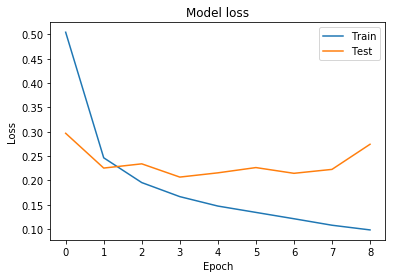

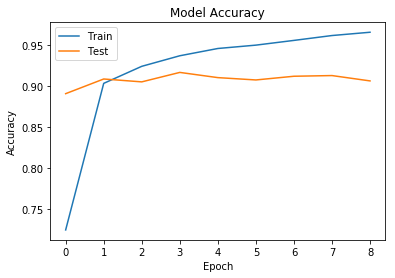

In [40]:
#Ploting the history to see what happened
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
plot_loss_accuracy(history)

In [38]:
res = model.evaluate(X_input, y, verbose=0)

print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

The accuracy evaluated on the test set is of 94.274%


**The model overfits realy fast. 2 epoch are enough**

In [39]:
from nbresult import ChallengeResult
result = ChallengeResult('C1517',
                         history=history.history)
result.write()